# Image Subset

In [2]:
import numpy as np
from skimage import io, color

In [3]:
# %load functions.py
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# A function to plot a matrix
def plot_image(data, colorspace='binary'):
    fig = plt.figure(figsize=(10,10)) 
    ax = fig.add_subplot(111)
    ax.imshow(data, cmap=colorspace)
    
    
def normalize_array(array):
    array_min = array.min(axis=(0, 1), keepdims=True)
    array_max = array.max(axis=(0, 1), keepdims=True)
    normalized_array = (array - array_min)/(array_max - array_min)
    
    return normalized_array

def normalize_with_preset(array, max_value, min_value):
    normalized_array = (array - min_value)/(max_value - min_value)
    
    return normalized_array


def recreate_image(labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = labels[label_idx]
            label_idx += 1
    return image

def overlay_images(image1, image2, colorspace1='binary', colorspace2='magma', transparency=0.5):
    plt.imshow(image1, cmap=colorspace1, interpolation='nearest')
    plt.imshow(image2, cmap=colorspace2, alpha=transparency, interpolation='bilinear')
    plt.show()
    
def flatten_normalize_neighbors(training_set, global_max=233, global_min=69):
    flattened_neighbors = []
    neighbors = training_set['neighbors']

    for i in range(len(neighbors)):
        numpy_array = np.array(neighbors[i]).reshape(-1, 1)
        normalized_neighbors = normalize_with_preset(numpy_array, global_max, global_min)
        flattened_neighbors.append(normalized_neighbors)
    
    return np.array(flattened_neighbors).reshape((len(flattened_neighbors), -1))

In [4]:
original_indios_a = io.imread('./orthomosaics/indios_a_transparent_mosaic_equalized.jpg', as_grey=False, plugin=None, flatten=None)
original_indios_b = io.imread('./orthomosaics/indios_b_transparent_mosaic_equalized.jpg', as_grey=False, plugin=None, flatten=None)

D:\Users\gavargas\Anaconda3\lib\site-packages\PIL\Image.py:2438: DecompressionBombWarning: Image size (428463012 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
D:\Users\gavargas\Anaconda3\lib\site-packages\PIL\Image.py:2438: DecompressionBombWarning: Image size (134397252 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


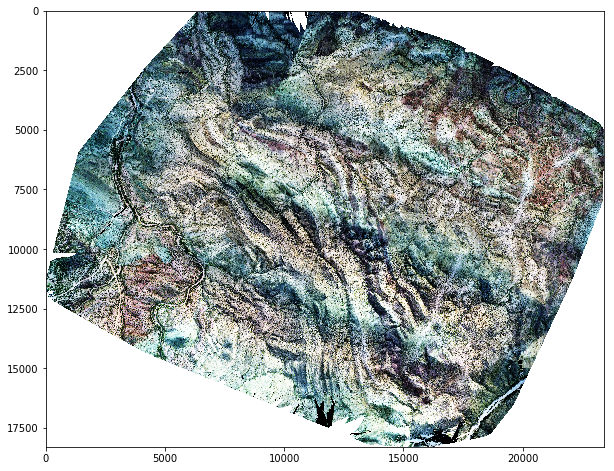

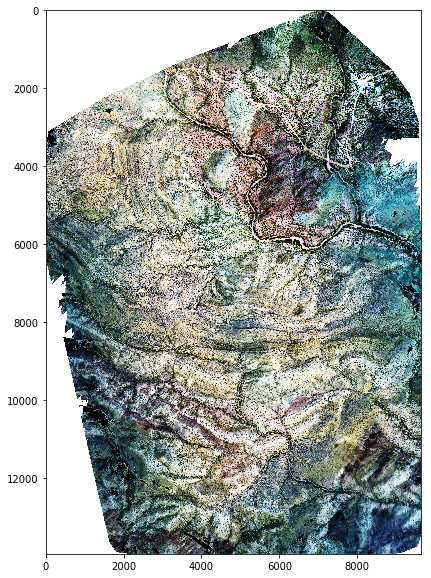

In [6]:
# plot_image(original_indios_a)
plot_image(original_indios_b)

In [8]:
# subset_indios_a = np.array(original_indios_a[2500:12500, 5000:15000, 0:3])
subset_indios_b = np.array(original_indios_b[2000:12000, 2000:8000, 0:3])

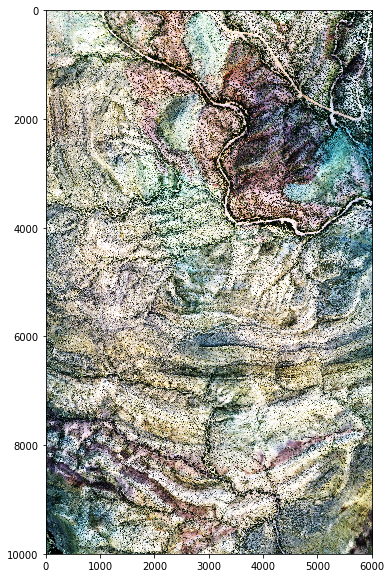

In [9]:
plot_image(subset_indios_b)

# Save the subset data

In [10]:
# np.save('./data_preprocessing/numpy_data/iny', subset_indios_a)
np.save('./data_preprocessing/numpy_data/indios_b/enhanced_full_indios_b', subset_indios_b)